In [ ]:
"%run -i \"D:\\Courses\\2019 Fall (Processing)\\CS-596 Machine Learning\\Assignments\\Assignment 3\\My Code\\main_part1.py\""


In [ ]:
import importlib
importlib.reload(my_FNN_Model)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import metrics
import util
import download_data as dl
import pandas as pd

from sklearn.model_selection import train_test_split

# Part II


#### Step 1 : Load Data

In [84]:
## step 1: load data from csv file. 
data = dl.download_data('crab.csv').values

n = 200
#split data 
S = np.random.permutation(n)
#100 training samples
Xtr = data[S[:100], :6]
Ytr = data[S[:100], 6:]
# 100 testing samples
X_test = data[S[100:], :6]
Y_test = data[S[100:], 6:].ravel()


#### Step 2: Randomly split

In [85]:
## step 2 randomly split Xtr/Ytr into two even subsets: use one for training, another for validation.
#############placeholder 1: training/validation #######################
n2 = len(Xtr)
S2 = np.random.permutation(n2)

# subsets for training models
x_train= Xtr[S2[:50]]
y_train= Ytr[S2[50:]].ravel()
# subsets for validation
x_validation= Xtr[S2[:50]]
y_validation= Ytr[S2[50:]].ravel()
############placeholder end #######################

#### Step 3.1 Plot the validation errors while using different values of C

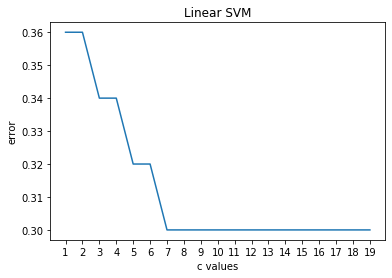

In [74]:
# 3.1 Plot the validation errors while using different values of C ( with other hyperparameters fixed) 
#  keeping kernel = "linear"
#############placeholder 2: Figure 1#######################
# c_range =  range(1,100,5) # For Poly
c_range =  range(1,20) #For linear
# c_range =  range(1,200,10) #For RBF
# c_range =  np.array(range(1,15))/10
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
#     model = svm.SVC(kernel='poly', C=c_value,gamma='scale')
#     model = svm.SVC(kernel='rbf', C=c_value, gamma='scale')
    model.fit(X=x_train, y=y_train)
    error = 1. - model.score(x_validation, y_validation)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
plt.xticks(c_range)
plt.show()
#############placeholder end #######################


#### Step 3.2 Plot the validation errors while using linear, RBF kernel, or Polynomial kernel

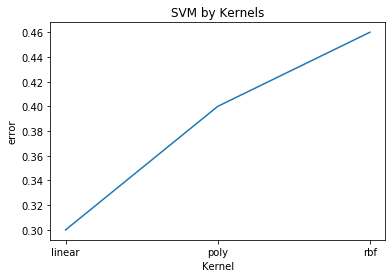

In [62]:
# 3.2 Plot the validation errors while using linear, RBF kernel, or Polynomial kernel ( with other hyperparameters fixed) 
#############placeholder 3: Figure 2#######################
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
c_value = 9
for kernel_value in kernel_types:
    # your own codes
    model = svm.SVC(kernel=kernel_value, C=c_value,gamma='scale')
    model.fit(X=x_train, y=y_train)
    error = 1. - model.score(x_validation, y_validation)
    svm_kernel_error.append(error)

plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()
#############placeholder end #######################

#### step 4 Select the best model and apply it over the testing subset 

In [81]:
## step 4 Select the best model and apply it over the testing subset 
#############placeholder 4:testing  #######################

best_kernel = 'linear'
best_c = 9 # poly had many that were the "best"
model = svm.SVC(kernel=best_kernel, C=best_c)
model.fit(X=x_train, y=y_train)

#############placeholder end #######################

SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Step 5: evaluate your results in terms of accuracy, real, or precision.

In [ ]:
## step 5 evaluate your results in terms of accuracy, real, or precision. 

#############placeholder 5: metrics #######################
# func_confusion_matrix is not included
# You might re-use this function for the Part I. 
y_pred = model.predict(X_test)
conf_matrix, accuracy, recall_array, precision_array = util.func_confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

#############placeholder end #######################

#############placeholder 6: success and failure examples #######################
# Success samples: samples for which you model can correctly predict their labels
correct_sample = np.equal(y_pred, Y_test)
correct_sample = np.where(correct_sample)[0]

correct = pd.DataFrame(X_test[correct_sample])
correct['GT'] = Y_test[correct_sample]
correct['Pred'] = y_pred[correct_sample]

print("Success samples:")
print(correct[:5])

# # Failure samples: samples for which you model can not correctly predict their labels
wrong_sample = np.not_equal(y_pred, Y_test)
wrong_sample = np.where(wrong_sample)[0]

wrong = pd.DataFrame(X_test[wrong_sample])
wrong['GT'] = Y_test[wrong_sample]
wrong['Pred'] = y_pred[wrong_sample]

print("Failure samples:")
print(wrong[:5])
#############placeholder end #######################

### Run Python file

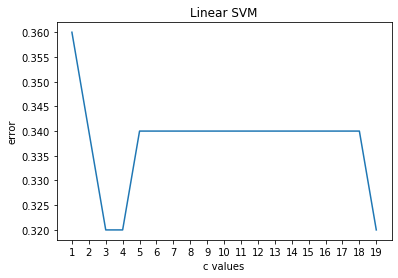

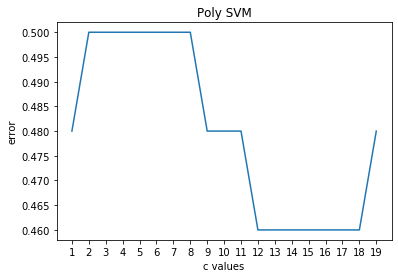

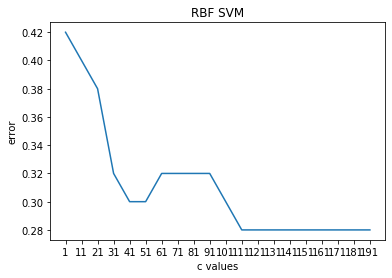

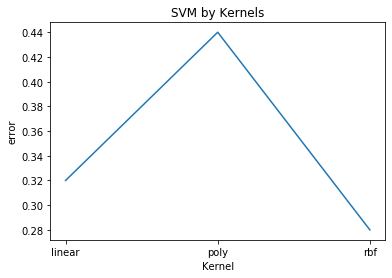

Confusion Matrix: 
[[15 35]
 [33 17]]
Average Accuracy: 0.32
Per-Class Precision: [0.3125     0.32692308]
Per-Class Recall: [0.3  0.34]
Success samples:
     0     1     2     3     4     5   GT  Pred
0  0.0  15.0  12.3  30.1  33.3  14.0  1.0   1.0
1  1.0  15.7  13.9  33.6  38.5  14.1  1.0   1.0
2  1.0   8.8   7.7  18.1  20.8   7.4 -1.0  -1.0
3  0.0  14.0  12.8  28.8  32.4  12.7  1.0   1.0
4  0.0  10.7   9.7  21.4  24.0   9.8  1.0   1.0
Failure samples:
     0     1     2     3     4     5   GT  Pred
0  1.0  15.9  12.7  34.0  38.9  14.2 -1.0   1.0
1  0.0  20.1  13.7  40.6  44.5  18.0 -1.0   1.0
2  0.0  19.7  16.7  39.9  43.6  18.2  1.0  -1.0
3  1.0  16.9  13.2  37.3  42.7  15.6 -1.0   1.0
4  0.0  16.3  11.6  31.6  34.2  14.5 -1.0   1.0


In [149]:
%run -i "D:\\Courses\\2019 Fall (Processing)\\CS-596 Machine Learning\\Assignments\\Assignment4&5\\MyCode\\my_SVM_Model.py"

In [ ]:
     0     1     2     3     4     5   GT  Pred
0  0.0  15.0  12.3  30.1  33.3  14.0  1.0   1.0
1  1.0  15.7  13.9  33.6  38.5  14.1  1.0   1.0
2  1.0   8.8   7.7  18.1  20.8   7.4 -1.0  -1.0
3  0.0  14.0  12.8  28.8  32.4  12.7  1.0   1.0
4  0.0  10.7   9.7  21.4  24.0   9.8  1.0   1.0

# Temporary Code

In [ ]:


## step 1: load data from csv file. 
data = dl.download_data('crab.csv').values

n = 200
#split data 
S = np.random.permutation(n)
#100 training samples
Xtr = data[S[:100], :6]
Ytr = data[S[:100], 6:]
# 100 testing samples
X_test = data[S[100:], :6]
Y_test = data[S[100:], 6:].ravel()

## step 2 randomly split Xtr/Ytr into two even subsets: use one for training, another for validation.
#############placeholder 1: training/validation #######################
n2 = len(Xtr)
S2 = np.random.permutation(n2)
 
# subsets for training models
x_train= 
y_train= 
# subsets for validation
x_validation= 
y_validation= 
#############placeholder end #######################

## step 3 Model selection over validation set
# consider the parameters C, kernel types (linear, RBF etc.) and kernel
# parameters if applicable. 


# 3.1 Plot the validation errors while using different values of C ( with other hyperparameters fixed) 
#  keeping kernel = "linear"
#############placeholder 2: Figure 1#######################
c_range =  #
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X=x_train, y=y_train)
    error = 1. - model.score(x_validation, y_validation)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
#plt.xticks(c_range)
plt.show()
#############placeholder end #######################


# 3.2 Plot the validation errors while using linear, RBF kernel, or Polynomial kernel ( with other hyperparameters fixed) 
#############placeholder 3: Figure 2#######################
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    # your own codes

    error =  
    svm_kernel_error.append(error)

plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()
#############placeholder end #######################


## step 4 Select the best model and apply it over the testing subset 
#############placeholder 4:testing  #######################

best_kernel = 'poly'
best_c = 1 # poly had many that were the "best"
model = svm.SVC(kernel=best_kernel, C=best_c)
model.fit(X=x_train, y=y_train)

#############placeholder end #######################


## step 5 evaluate your results in terms of accuracy, real, or precision. 

#############placeholder 5: metrics #######################
# func_confusion_matrix is not included
# You might re-use this function for the Part I. 
y_pred = model.predict(X_test)
conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

#############placeholder end #######################

#############placeholder 6: success and failure examples #######################
# Success samples: samples for which you model can correctly predict their labels
# Failure samples: samples for which you model can not correctly predict their labels

#############placeholder end #######################



